# **Trabalho Final IA 1**

**Aluno: Arthur Oliveira Tavares**

**Matrícula: 202202306**

#**Projeto Final: Prevendo os pontos do Ibovespa**

 Antes de prosseguir, é necessário entender um pouco do contexto do trabalho antes de prosseguir. O Ibovespa basicamente é o principal indicador de desempenho que temos das ações negociadas na nossa bolsa de valores, a B3. Basicamente, podemos acompanhar os pontos do mercado do Ibovespa para conseguirmos analisar como está indo o mercado brasileiro.
  
  No entanto, há diversos fatores e variáveis que podem alterar a pontuação e o como está indo o mercado brasileiro, como as variaveis macroeconomicas, indicadores financeiros e até mesmo de alguns setores.

  O tema escolhido vem de interesse próprio no mercado financeiro, pois sempre me interessei por esse tipo de mercado e venho o estudando por algum tempo. E com esse projeto, enxerguei uma oportunidade para desenvolver os conhecimentos até aqui adquiridos.

  Portanto, o objetivo desse trabalho é desenvolver dois modelos de regressão para predizer com base nas variaveis reais que se tem para predizer a pontuação da bolsa de valores brasileira, dado o seguimento do projeto. O objetivo além de desenvolver o modelo, é justificar o uso e explorar os conceitos para prosseguir com o desenvovimento, sempre seguindo os critérios de avaliação estabelecidos no trabalho:

  ● Clareza e profundidade na análise exploratória.

● Qualidade da modelagem e justificativa para escolha dos algoritmos.

● Robustez na validação e avaliação do modelo.

● Originalidade na aplicação prática e relevância do problema escolhido.

● Qualidade da apresentação e organização do relatório final.

# Carregando,Pré-Processando os dados

A primeira etapa do trabalho é carregar e pré-processar os dados antes de começar a analisar os dados e a análise exploratória. Para isso, busquei diferentes fontes de dados reais para prever a pontuação do Ibovespa. Dentre esses dados eu selecionei:



*   Cotação do Dollar (em reais);
*   Taxa do IPCA;

*   Taxa Selic;
*   Taxa de Desemprego no Brasil;


**Justificativa da escolha dessas bases de dados:**

A justificativa se da pois essas são variaveis que devem ter inferência na cotação da bolsa de valores, pois são variaveis que impactam os valores e até mesmo o mercado brasileiro, com a análise exploratória, poderei comprovar essa informação ou questiona-la.







In [2]:
import pandas as pd

In [3]:
dados_ibovespa = pd.read_csv('/content/drive/MyDrive/Inteligência Artificial 1/Base de Dados Trabalho Final/Dados Históricos Ibovespa.csv')
dados_dollar = pd.read_csv('/content/drive/MyDrive/Inteligência Artificial 1/Base de Dados Trabalho Final/Base de Dados Dollar.csv')
dados_ipca = pd.read_excel('/content/drive/MyDrive/Inteligência Artificial 1/Base de Dados Trabalho Final/ipca extraído.xlsx')
dados_selic = pd.read_excel('/content/drive/MyDrive/Inteligência Artificial 1/Base de Dados Trabalho Final/taxa selic.xlsx')
dados_desemprego = pd.read_excel('/content/drive/MyDrive/Inteligência Artificial 1/Base de Dados Trabalho Final/taxa de desemprego.xlsx')

**1° Passo: Mesclar a base de dados**

Como as variáveis escolhidas estão em diferentes bases de dados o primeiro passo é juntar as bases de dados e escolhendo quais dados vamos extrair.

In [4]:
dados_ibovespa.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,29.11.2024,125.668,124.611,126.056,123.946,"16,40B","0,85%"
1,28.11.2024,124.610,127.667,127.668,124.390,"12,83B","-2,40%"
2,27.11.2024,127.669,129.923,130.283,127.669,"12,32B","-1,73%"
3,26.11.2024,129.922,129.043,130.361,129.042,"9,75B","0,69%"
4,25.11.2024,129.036,129.125,129.495,128.932,"14,41B","-0,07%"


Irei considerar 4 variaveis desse df do ibovespa, sendo elas possiveis para descarte posteriormente também. Mas irei pegar apenas: A data, o último (que é o fechamento), o Volume do dia e a var%.

In [5]:
dados_ibovespa = dados_ibovespa[['Data','Último','Vol.','Var%']]

In [6]:
# Renomeando as duas últimas colunas apenas para ficar mais didático
dados_ibovespa.rename(columns={'Último':'Pontuação Ibovespa','Vol.':'Volume', 'Var%': 'Variação do Ibovespa'},inplace=True)

<ipython-input-6-05b93490efee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_ibovespa.rename(columns={'Último':'Pontuação Ibovespa','Vol.':'Volume', 'Var%': 'Variação do Ibovespa'},inplace=True)


In [7]:
dados_ibovespa.head()

,Data,Pontuação Ibovespa,Volume,Variação do Ibovespa
0,29.11.2024,125.668,"16,40B","0,85%"
1,28.11.2024,124.610,"12,83B","-2,40%"
2,27.11.2024,127.669,"12,32B","-1,73%"
3,26.11.2024,129.922,"9,75B","0,69%"
4,25.11.2024,129.036,"14,41B","-0,07%"


In [8]:
dados_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Data                  479 non-null    object 
 1   Pontuação Ibovespa    479 non-null    float64
 2   Volume                479 non-null    object 
 3   Variação do Ibovespa  479 non-null    object 
dtypes: float64(1), object(3)
memory usage: 15.1+ KB


In [9]:
# Agora todo o processo para o dollar
dados_dollar.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,29.11.2024,"5,9730","6,0031","6,1150","5,9551",NaN,"-0,69%"
1,28.11.2024,"6,0142","5,9700","6,0217","5,9450",NaN,"1,29%"
2,27.11.2024,"5,9377","5,8117","5,9389","5,8030",NaN,"2,21%"
3,26.11.2024,"5,8095","5,8112","5,8330","5,7801",NaN,"0,19%"
4,25.11.2024,"5,7983","5,7861","5,8204","5,7749",NaN,"-0,05%"


In [10]:
dados_dollar = dados_dollar[['Data','Último']]

In [11]:
dados_dollar.rename(columns={'Último':'Dólar'},inplace=True)

<ipython-input-11-dcc67301c8fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_dollar.rename(columns={'Último':'Dólar'},inplace=True)


In [12]:
dados_dollar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    496 non-null    object
 1   Dólar   496 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


In [13]:
dados_dollar.head()

,Data,Dólar
0,29.11.2024,"5,9730"
1,28.11.2024,"6,0142"
2,27.11.2024,"5,9377"
3,26.11.2024,"5,8095"
4,25.11.2024,"5,7983"


**Pontos a serem observados:**

A cotação do dollar tem mais registros que o da bolsa de valores, mais precisamente 17 registros, o que dão registros diferentes. Porém vou usar uma função para ignorar as datas, e assim irei apenas juntar as duas novamente.

In [14]:
df = pd.merge(dados_ibovespa,dados_dollar,on='Data')

In [15]:
df.head()

,Data,Pontuação Ibovespa,Volume,Variação do Ibovespa,Dólar
0,29.11.2024,125.668,"16,40B","0,85%","5,9730"
1,28.11.2024,124.610,"12,83B","-2,40%","6,0142"
2,27.11.2024,127.669,"12,32B","-1,73%","5,9377"
3,26.11.2024,129.922,"9,75B","0,69%","5,8095"
4,25.11.2024,129.036,"14,41B","-0,07%","5,7983"


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Data                  479 non-null    object 
 1   Pontuação Ibovespa    479 non-null    float64
 2   Volume                479 non-null    object 
 3   Variação do Ibovespa  479 non-null    object 
 4   Dólar                 479 non-null    object 
dtypes: float64(1), object(4)
memory usage: 18.8+ KB


**Compreendeendo as outras bases de dados:**

As outras bases de dados que vão vir, são valores que são dados por intervalos, não são cotados por dia. Por exemplo a taxa selic é definida a cada 45 dias pelo COPOM, o IPCA (que mede a inflação) é calculada a cada mês, assim como a taxa de desemprego.

Haja vista isso, para se aproximar de algo mais real, iremos definir a taxa no do período de acordo com os perídoso da bolsa.

**OBS:** Até a data do começo do desenvolvimento do trabalho (03/12/2024) ainda não se tem dados do IPCA no mês de novembro, ou seja, irei reduzir a base na frente até o último dia de outubro apenas.

In [17]:
dados_ipca.head()

,Mês,Variação no Mês
0,2023-01-01,0.53
1,2023-02-01,0.84
2,2023-03-01,0.71
3,2023-04-01,0.61
4,2023-05-01,0.23


In [18]:
dados_selic.head()

,Período,Taxa Selic (%)
0,2023-01-01,13.75
1,2023-08-02,13.25
2,2023-09-20,12.75
3,2023-11-01,12.25
4,2023-12-13,11.75


In [19]:
dados_desemprego.head()

,Período,Taxa de Desemprego (%)
0,2023-01-01,8.1
1,2023-02-28,7.9
2,2023-03-17,8.4
3,2023-03-31,8.6
4,2023-04-28,8.8


**2° Passo: Mesclar as 3 últimas base de dados na base de dados principal**

In [20]:
# Vou converter a coluna Data de DF para uma variavel do tipo data mesmo, pois ela está como object
df['Data'] = pd.to_datetime(df['Data'], errors='coerce', dayfirst=True)

In [21]:
df.head()

,Data,Pontuação Ibovespa,Volume,Variação do Ibovespa,Dólar
0,2024-11-29,125.668,"16,40B","0,85%","5,9730"
1,2024-11-28,124.610,"12,83B","-2,40%","6,0142"
2,2024-11-27,127.669,"12,32B","-1,73%","5,9377"
3,2024-11-26,129.922,"9,75B","0,69%","5,8095"
4,2024-11-25,129.036,"14,41B","-0,07%","5,7983"


In [22]:
# Agora vou filtrar até o último dia de outubro (pois só temos dados do IPCA até outubro)
df = df[df['Data'] <= '2024-10-31']

In [23]:
# Vou tratar da mesma forma as outras bases de dados e deixar a coluna com o nome 'Data' também
dados_selic['Data'] = pd.to_datetime(dados_selic['Período'], errors='coerce', dayfirst=True)
dados_ipca['Data'] = pd.to_datetime(dados_ipca['Mês'], errors='coerce', dayfirst=True)
dados_desemprego['Data'] = pd.to_datetime(dados_desemprego['Período'], errors='coerce', dayfirst=True)

**Após essa etapa, o que resta é ordenar pela data e juntar na base de dados.**

Após isso, irei verificar para ver se foi corretamente

In [24]:
df = df.sort_values(by='Data')
dados_selic = dados_selic.sort_values(by='Data')
dados_ipca = dados_ipca.sort_values(by='Data')
dados_desemprego = dados_desemprego.sort_values(by='Data')

In [25]:
# Selecionando as colunas que eu quero de cada base
dados_selic = dados_selic[['Data','Taxa Selic (%)']]
dados_ipca = dados_ipca[['Data','Variação no Mês']]
dados_desemprego = dados_desemprego[['Data','Taxa de Desemprego (%)']]

In [26]:
# Agora vou juntar todas de uma vez
df = pd.merge_asof(df, dados_selic, on='Data')
df = pd.merge_asof(df, dados_ipca, on='Data')
df = pd.merge_asof(df, dados_desemprego, on='Data')

In [27]:
df.head()

,Data,Pontuação Ibovespa,Volume,Variação do Ibovespa,Dólar,Taxa Selic (%),Variação no Mês,Taxa de Desemprego (%)
0,2023-01-03,104.166,"14,47M","-2,08%","5,4797",13.75,0.53,8.1
1,2023-01-04,105.334,"14,45M","1,12%","5,4312",13.75,0.53,8.1
2,2023-01-05,107.641,"15,51M","2,19%","5,3509",13.75,0.53,8.1
3,2023-01-06,108.964,"12,63M","1,23%","5,2254",13.75,0.53,8.1
4,2023-01-09,109.130,"12,05M","0,15%","5,2546",13.75,0.53,8.1


Para verificar se foi corretamente, irei fazer um groupby e analisar para ver se está de acordo com o esperado

In [28]:
df_teste = df.copy()
df_teste['Ano_mes'] = df_teste['Data'].dt.to_period('M')
df_teste = df_teste.groupby('Ano_mes')[['Taxa Selic (%)', 'Taxa de Desemprego (%)', 'Variação no Mês']].mean()
print(df_teste)

         Taxa Selic (%)  Taxa de Desemprego (%)  Variação no Mês
Ano_mes                                                         
2023-01       13.750000                8.100000             0.53
2023-02       13.750000                8.088889             0.84
2023-03       13.750000                8.147826             0.71
2023-04       13.750000                8.611111             0.61
2023-05       13.750000                8.786364             0.23
2023-06       13.750000                8.490476            -0.08
2023-07       13.750000                8.271429             0.12
2023-08       13.271739                7.995652             0.23
2023-09       13.050000                7.895000             0.26
2023-10       12.750000                7.795238             0.24
2023-11       12.250000                7.695000             0.28
2023-12       11.960526                7.600000             0.56
2024-01       11.727273                7.495455             0.42
2024-02       11.250000  

Correto, saiu como o esperado. Agora antes de ir para a análise exploratória, vou renomear "Variação do Mês" para IPCA no mês, para ficar mais didático.

In [29]:
df.rename(columns={'Variação no Mês':'IPCA'},inplace=True)

In [30]:
df.head()

,Data,Pontuação Ibovespa,Volume,Variação do Ibovespa,Dólar,Taxa Selic (%),IPCA,Taxa de Desemprego (%)
0,2023-01-03,104.166,"14,47M","-2,08%","5,4797",13.75,0.53,8.1
1,2023-01-04,105.334,"14,45M","1,12%","5,4312",13.75,0.53,8.1
2,2023-01-05,107.641,"15,51M","2,19%","5,3509",13.75,0.53,8.1
3,2023-01-06,108.964,"12,63M","1,23%","5,2254",13.75,0.53,8.1
4,2023-01-09,109.130,"12,05M","0,15%","5,2546",13.75,0.53,8.1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Data                    460 non-null    datetime64[ns]
 1   Pontuação Ibovespa      460 non-null    float64       
 2   Volume                  460 non-null    object        
 3   Variação do Ibovespa    460 non-null    object        
 4   Dólar                   460 non-null    object        
 5   Taxa Selic (%)          460 non-null    float64       
 6   IPCA                    460 non-null    float64       
 7   Taxa de Desemprego (%)  460 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 28.9+ KB


**3° Passo: Transformar o tipo de dados**

Na cédula de código acima, observamos que as colunas Volume, Variação do Ibovespa e Dólar estão no tipo *object*, o que impossibilita por exemplo ver a correlação das variáveis, haja vista que as mesmas não são numéricas. Então o próximo passo vai ser fazer a transformação dessas variáveis.

Também, percebemos que a coluna Fechamento da B3 está no formato errado, pois ela é uma variavel continua que no exemplo era apenas um número inteiro. No entanto a leitura o interpretou de maneira **incorreta**, pois o '.' aqui em um número serve para separar suas casas decimais do mesmo. Então para essa análise iremos deixar ele em float64, no entanto retirar o '.'.

In [32]:
# Transformação do Dollar
df['Dólar'] = df['Dólar'].str.replace(',', '.').astype(float)

# Transformação do Ibovespa
df['Variação do Ibovespa'] = df['Variação do Ibovespa'].str.replace('%', '').str.replace(',', '.').astype(float)

# Transformando os pontos do ibovespa
df['Pontuação Ibovespa'] = df['Pontuação Ibovespa'].astype(str).str.replace('.', '').astype(float)



In [33]:
# Tratando o volume
def converter_volume(valor):
    if 'M' in valor:
        return float(valor.replace('M', '').replace(',', '.')) * 1_000_000
    elif 'B' in valor:
        return float(valor.replace('B', '').replace(',', '.')) * 1_000_000_000
    else:
        return float(valor.replace(',', '.'))

df['Volume'] = df['Volume'].apply(converter_volume)

In [34]:
df.head()

,Data,Pontuação Ibovespa,Volume,Variação do Ibovespa,Dólar,Taxa Selic (%),IPCA,Taxa de Desemprego (%)
0,2023-01-03,104166.0,14470000.0,-2.08,5.4797,13.75,0.53,8.1
1,2023-01-04,105334.0,14450000.0,1.12,5.4312,13.75,0.53,8.1
2,2023-01-05,107641.0,15510000.0,2.19,5.3509,13.75,0.53,8.1
3,2023-01-06,108964.0,12630000.0,1.23,5.2254,13.75,0.53,8.1
4,2023-01-09,10913.0,12050000.0,0.15,5.2546,13.75,0.53,8.1


# Análise Exploratória dos dados

**OBS:** Antes de prosseguir com a análise exploratória, irei detalhar o contexto breve de cada variavel para que fique mais completo e didático o entendimento de toda a análise.

**Data:** É a data do dia, o período do estudo vai do dia 03/01/2023 até 31/10/2024

**Pontuação do Ibovespa:** É a pontuação do Ibovespa, que é o principal indicativo da B3 ( a bolsa de valores brasileira);

**Volume:** Diz a respeito sobre o quanto houve em R$ na bolsa de valores em um determinado período, no caso desse df, no dia exato.

**Variação do Ibovespa:** É a variação da pontuação do ibovespa de um dia para o outro.

**Dólar:** É a cotação do dólar no dia.

**Taxa Selic:**  É a taxa básica de juros da economia brasileira, que serve como base para calcular os juros praticados no país

**IPCA:** É um indicador que mede a variação de preços de produtos e serviços consumidos pela população, basicamente é a inflação. Que aqui está cotada no dia e a variação dela é por mês.

**Taxa de Desemprego:** Mede a taxa de desemprego do Brasil de forma geral

**1° Passo: Entender o DataFrame**

Após o tratamento em toda a estrutura acima, iremos ver se há algo pendente (como dados faltantes) e algumas estatísticas básicas do dataframe

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Data                    460 non-null    datetime64[ns]
 1   Pontuação Ibovespa      460 non-null    float64       
 2   Volume                  460 non-null    float64       
 3   Variação do Ibovespa    460 non-null    float64       
 4   Dólar                   460 non-null    float64       
 5   Taxa Selic (%)          460 non-null    float64       
 6   IPCA                    460 non-null    float64       
 7   Taxa de Desemprego (%)  460 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 28.9 KB


In [36]:
df.describe()

,Data,Pontuação Ibovespa,Volume,Variação do Ibovespa,Dólar,Taxa Selic (%),IPCA,Taxa de Desemprego (%)
count,460,460.000000,4.600000e+02,460.000000,460.000000,460.000000,460.000000,460.000000
mean,2023-12-04 13:15:07.826086912,108738.819565,1.670997e+08,0.047370,5.128550,12.152174,0.374087,7.739783
min,2023-01-03 00:00:00,1047.000000,4.330000e+06,-2.400000,4.724100,10.500000,-0.080000,6.400000
25%,2023-06-20 18:00:00,109140.000000,8.955000e+06,-0.542500,4.930675,10.750000,0.230000,7.500000
50%,2023-12-04 12:00:00,119528.500000,1.058000e+07,-0.010000,5.047750,12.250000,0.380000,7.800000
75%,2024-05-22 06:00:00,128011.000000,1.275500e+07,0.650000,5.261450,13.750000,0.560000,8.100000
max,2024-10-31 00:00:00,137344.000000,9.070000e+09,4.290000,5.786700,13.750000,0.840000,8.800000
std,NaN,35640.306768,1.109805e+09,0.927972,0.261692,1.351367,0.238079,0.571437


Observa que em uma análise básica, os dados estão corretos e não há anomalias presentes até o momento

**2° Passo: Entendendo visualmente as variaveis**

Agora vou plotar alguns gráficos com as variavel dependente (Pontuação do Ibovespa) em realação as variaveis indepentes (as demais variaveis)

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

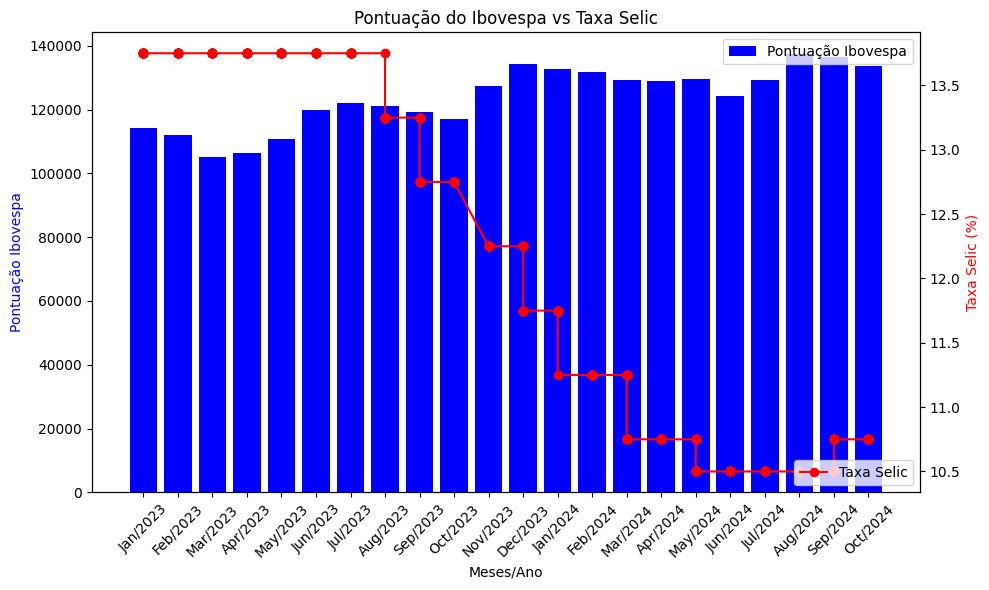

In [38]:
# Taxa Selic

fig, ax1 = plt.subplots(figsize=(10, 6))

meses = df['Data'].dt.strftime('%b/%Y')
ax1.bar(meses, df['Pontuação Ibovespa'], color='blue', label='Pontuação Ibovespa')
ax1.set_xlabel('Meses/Ano')
ax1.set_ylabel('Pontuação Ibovespa', color='blue')

# Eixo Y
ax2 = ax1.twinx()
ax2.plot(meses, df['Taxa Selic (%)'], color='red', marker='o', label='Taxa Selic')
ax2.set_ylabel('Taxa Selic (%)', color='red')

# Título e Legendas
plt.title('Pontuação do Ibovespa vs Taxa Selic')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper right')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [39]:
# Observando por tabela
df['Mês/Ano'] = df['Data'].dt.to_period('M')
df_grouped = df.groupby('Mês/Ano')[['Pontuação Ibovespa', 'Taxa Selic (%)']].mean().reset_index()
print(df_grouped)

    Mês/Ano  Pontuação Ibovespa  Taxa Selic (%)
0   2023-01        96604.095238       13.750000
1   2023-02        96909.166667       13.750000
2   2023-03        89903.347826       13.750000
3   2023-04        93392.055556       13.750000
4   2023-05        98509.863636       13.750000
5   2023-06       107107.809524       13.750000
6   2023-07       108876.571429       13.750000
7   2023-08        99068.565217       13.271739
8   2023-09       116960.000000       13.050000
9   2023-10        99717.761905       12.750000
10  2023-11       112172.150000       12.250000
11  2023-12       123769.368421       11.960526
12  2024-01       129677.136364       11.727273
13  2024-02       116813.526316       11.250000
14  2024-03       104592.250000       11.075000
15  2024-04       115825.227273       10.750000
16  2024-05       104549.428571       10.547619
17  2024-06       110537.850000       10.500000
18  2024-07       107050.739130       10.500000
19  2024-08       127542.500000       10

**Interpretação:** Notamos que **normalmente**, quando a Taxa Selic está acima há menos movimentação na bolsa de valores, e o inverso é a mesma coisa. Isso ocorre pois os investimentos em renda fixa, como poupança e títulos, rendem menos, devido ao juros baixo do país. Isso faz as pessoas buscarem outras formas de ganhar mais dinheiro, como investir na bolsa de valores, onde os lucros podem ser maiores. Além disso, empresas conseguem empréstimos mais baratos, o que as ajuda a crescer e atrai mais investidores. Por isso, a bolsa fica mais movimentada

E quando a taxa de juros está alta, por exemplo 13,75% a.a. os investimentos da renda fixa e títulos do governo são mais atrativas devido a segurança e boa rentabilidade.

In [40]:
# Observando por tabela
df['Mês/Ano'] = df['Data'].dt.to_period('M')
df_grouped = df.groupby('Mês/Ano')[['Pontuação Ibovespa', 'Dólar']].mean().reset_index()
print(df_grouped)

    Mês/Ano  Pontuação Ibovespa     Dólar
0   2023-01        96604.095238  5.185952
1   2023-02        96909.166667  5.178544
2   2023-03        89903.347826  5.202509
3   2023-04        93392.055556  5.010628
4   2023-05        98509.863636  4.978550
5   2023-06       107107.809524  4.844700
6   2023-07       108876.571429  4.802048
7   2023-08        99068.565217  4.907235
8   2023-09       116960.000000  4.944105
9   2023-10        99717.761905  5.063110
10  2023-11       112172.150000  4.897900
11  2023-12       123769.368421  4.899447
12  2024-01       129677.136364  4.915905
13  2024-02       116813.526316  4.962300
14  2024-03       104592.250000  4.978960
15  2024-04       115825.227273  5.126250
16  2024-05       104549.428571  5.135000
17  2024-06       110537.850000  5.396505
18  2024-07       107050.739130  5.543739
19  2024-08       127542.500000  5.553809
20  2024-09       110831.000000  5.540443
21  2024-10       120607.391304  5.623461


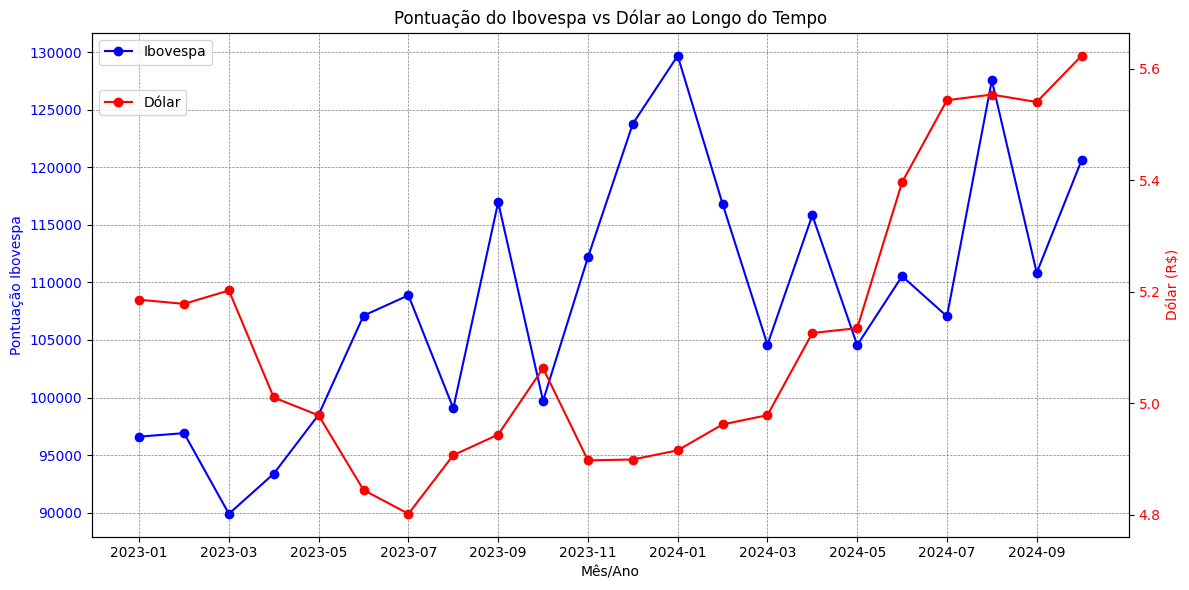

In [41]:
# Dólar

fig, ax1 = plt.subplots(figsize=(12, 6))

# Pontuação Ibovespa
ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel('Pontuação Ibovespa', color='blue')
ax1.plot(df_grouped['Mês/Ano'].astype(str), df_grouped['Pontuação Ibovespa'], color='blue', marker='o', label='Ibovespa')
ax1.tick_params(axis='y', labelcolor='blue')

# Dólar
ax2 = ax1.twinx()
ax2.set_ylabel('Dólar (R$)', color='red')
ax2.plot(df_grouped['Mês/Ano'].astype(str), df_grouped['Dólar'], color='red', marker='o', label='Dólar')
ax2.tick_params(axis='y', labelcolor='red')

# Configurando o título
plt.title('Pontuação do Ibovespa vs Dólar ao Longo do Tempo')



ticks = range(0, len(df_grouped), 2)  # Exibir rótulos a cada 2 meses
plt.xticks(ticks=ticks, labels=df_grouped['Mês/Ano'].astype(str).iloc[ticks], rotation=45)
ax1.grid(visible=True, which='both', axis='both', linestyle='--', linewidth=0.5, color='gray')

# Configurando as legendas
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.9))

fig.tight_layout()

plt.show()

**Interpretação:** Podemos observar que na maioria das vezes que o dólar sobe a pontuação do Ibovespa cai,  e o contrário também ocorre.  

Podemos ter varios fatores por conta disso, porém um dos mais relevantes são. Com a  alta do dólar, a confiança no mercado brasileiro cai para os investidores grandes e as empresas que importam sofrem com  a alta do  dólar. Já quando o  dólar cai, o mercado brasileiro ganha mais confiança dos investidores, a exportação de produtos para fora é favorecida e  a importação é mais barata.

In [42]:
# Agrupando com o IPCA
df_grouped2 = df.groupby('Mês/Ano')[['Pontuação Ibovespa','IPCA']].mean().reset_index()
print(df_grouped2)

    Mês/Ano  Pontuação Ibovespa  IPCA
0   2023-01        96604.095238  0.53
1   2023-02        96909.166667  0.84
2   2023-03        89903.347826  0.71
3   2023-04        93392.055556  0.61
4   2023-05        98509.863636  0.23
5   2023-06       107107.809524 -0.08
6   2023-07       108876.571429  0.12
7   2023-08        99068.565217  0.23
8   2023-09       116960.000000  0.26
9   2023-10        99717.761905  0.24
10  2023-11       112172.150000  0.28
11  2023-12       123769.368421  0.56
12  2024-01       129677.136364  0.42
13  2024-02       116813.526316  0.83
14  2024-03       104592.250000  0.16
15  2024-04       115825.227273  0.38
16  2024-05       104549.428571  0.46
17  2024-06       110537.850000  0.21
18  2024-07       107050.739130  0.38
19  2024-08       127542.500000 -0.02
20  2024-09       110831.000000  0.44
21  2024-10       120607.391304  0.56


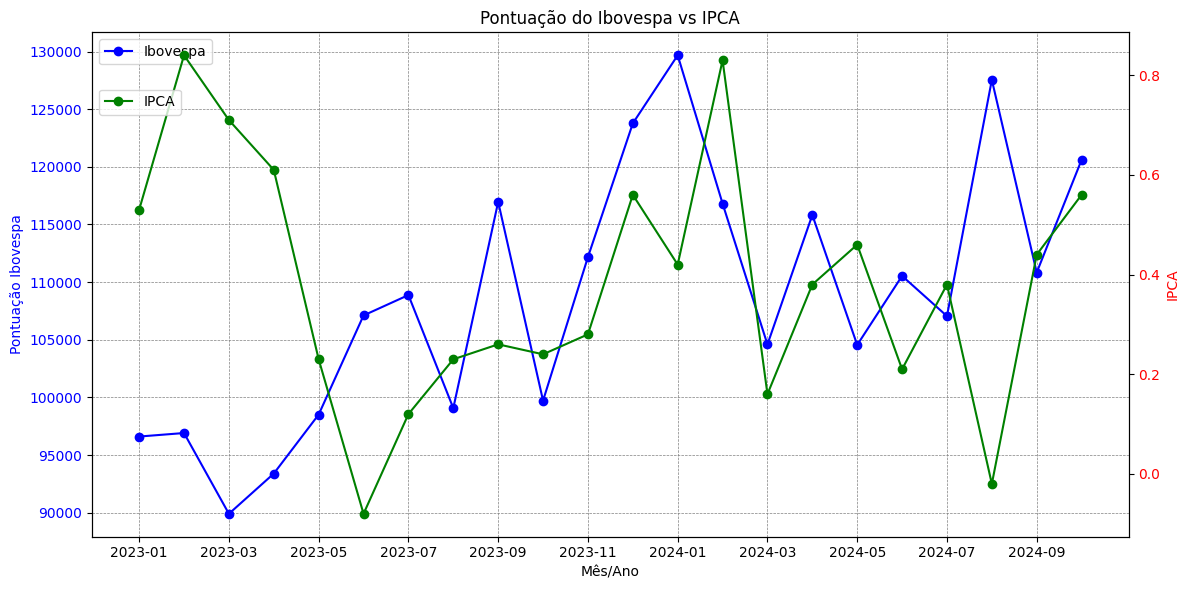

In [43]:
# IPCA

fig, ax1 = plt.subplots(figsize=(12, 6))

# Pontuação Ibovespa
ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel('Pontuação Ibovespa', color='blue')
ax1.plot(df_grouped2['Mês/Ano'].astype(str), df_grouped2['Pontuação Ibovespa'], color='blue', marker='o', label='Ibovespa')
ax1.tick_params(axis='y', labelcolor='blue')

# IPCA
ax2 = ax1.twinx()
ax2.set_ylabel('IPCA', color='red')
ax2.plot(df_grouped2['Mês/Ano'].astype(str), df_grouped2['IPCA'], color='green', marker='o', label='IPCA')
ax2.tick_params(axis='y', labelcolor='red')

# Configurando o título
plt.title('Pontuação do Ibovespa vs IPCA')



ticks = range(0, len(df_grouped), 2)  # Exibir rótulos a cada 2 meses
plt.xticks(ticks=ticks, labels=df_grouped['Mês/Ano'].astype(str).iloc[ticks], rotation=45)
ax1.grid(visible=True, which='both', axis='both', linestyle='--', linewidth=0.5, color='gray')

# Configurando as legendas
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.9))

fig.tight_layout()

plt.show()

**Interpretação:**
Podemos notar que quando a inflação está controlada, os investimentos na bolsa tendem a aumentar, e o contrário é real.

Isso nos indica de que alta do IPCA, o Ibovespa apresenta queda, refletindo o impacto negativo da inflação sobre a economia e os investimentos. Essa relação inversa reflete como a inflação afeta a atratividade da renda variável. Além disso, a volatilidade do Ibovespa é mais pronunciada em comparação ao IPCA, evidenciando a natureza dinâmica do mercado acionário.

In [44]:
# Agrupando por taxa de desemprego

df_grouped3 = df.groupby('Mês/Ano')[['Pontuação Ibovespa','Taxa de Desemprego (%)']].mean().reset_index()
print(df_grouped3)

    Mês/Ano  Pontuação Ibovespa  Taxa de Desemprego (%)
0   2023-01        96604.095238                8.100000
1   2023-02        96909.166667                8.088889
2   2023-03        89903.347826                8.147826
3   2023-04        93392.055556                8.611111
4   2023-05        98509.863636                8.786364
5   2023-06       107107.809524                8.490476
6   2023-07       108876.571429                8.271429
7   2023-08        99068.565217                7.995652
8   2023-09       116960.000000                7.895000
9   2023-10        99717.761905                7.795238
10  2023-11       112172.150000                7.695000
11  2023-12       123769.368421                7.600000
12  2024-01       129677.136364                7.495455
13  2024-02       116813.526316                7.410526
14  2024-03       104592.250000                7.610000
15  2024-04       115825.227273                7.804545
16  2024-05       104549.428571                7

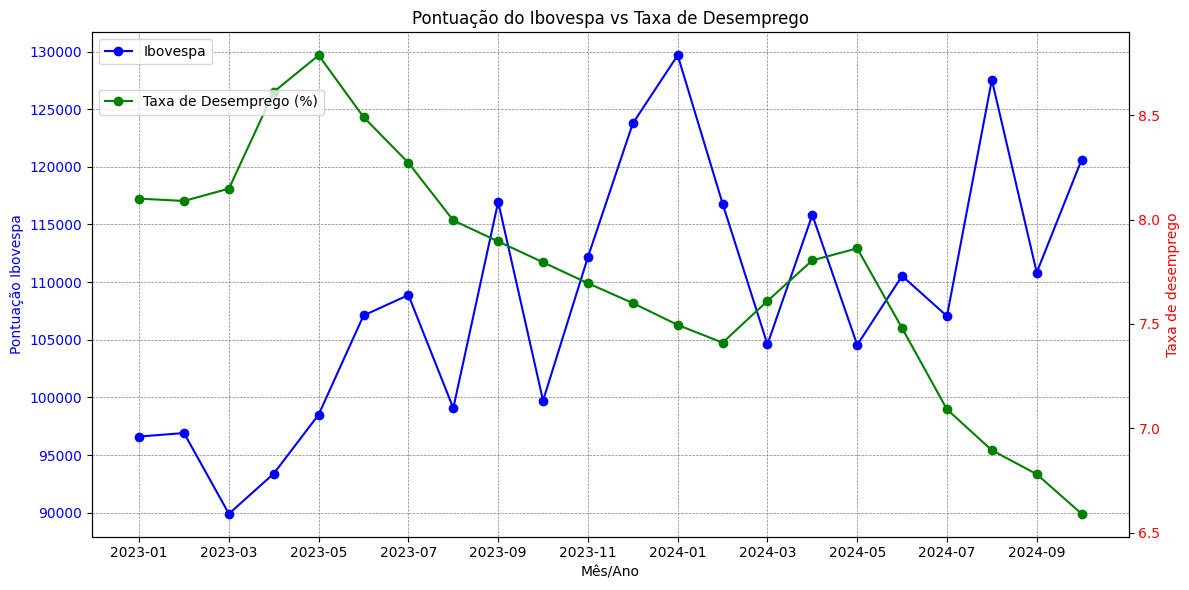

In [45]:
# Taxa de Desemprego


fig, ax1 = plt.subplots(figsize=(12, 6))

# Pontuação Ibovespa
ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel('Pontuação Ibovespa', color='blue')
ax1.plot(df_grouped3['Mês/Ano'].astype(str), df_grouped3['Pontuação Ibovespa'], color='blue', marker='o', label='Ibovespa')
ax1.tick_params(axis='y', labelcolor='blue')

# Desemprego
ax2 = ax1.twinx()
ax2.set_ylabel('Taxa de desemprego', color='red')
ax2.plot(df_grouped3['Mês/Ano'].astype(str), df_grouped3['Taxa de Desemprego (%)'], color='green', marker='o', label='Taxa de Desemprego (%)')
ax2.tick_params(axis='y', labelcolor='red')

# Configurando o título
plt.title('Pontuação do Ibovespa vs Taxa de Desemprego')



ticks = range(0, len(df_grouped), 2)  # Exibir rótulos a cada 2 meses
plt.xticks(ticks=ticks, labels=df_grouped['Mês/Ano'].astype(str).iloc[ticks], rotation=45)
ax1.grid(visible=True, which='both', axis='both', linestyle='--', linewidth=0.5, color='gray')

# Configurando as legendas
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.9))

fig.tight_layout()

plt.show()

In [46]:
df_teste.head()

,Taxa Selic (%),Taxa de Desemprego (%),Variação no Mês
Ano_mes,,,
2023-01,13.75,8.100000,0.53
2023-02,13.75,8.088889,0.84
2023-03,13.75,8.147826,0.71
2023-04,13.75,8.611111,0.61
2023-05,13.75,8.786364,0.23


multicolearidade se muitas tiverem uma alta correlação gera tendencias, como o dobro de peso para uma variação -> Viés

P valor de cada teste de cada teste de correlação -> Dizer se uma variavel é realmente correlacionada.


**Interpretação** Podemos interpretar que em todas as quedas da  taxa de desemprego, a pontuação  da bolsa subiu, o que se pode interpretar que com um ambiente de trabalho mais empregado, as empresas tem mais investimentos. No entanto notamos que nem em todos os meses isso ocorreu.

**OBS:** Após analisarmos todas as variaveis selecionadas, podemos tirar alguns insights sobre determinadas variaveis e o ibovespa. Mas verificamos também que isoladas, elas não dizem tanto  a respeito sobre a pontuação do ibovespa. Então o próximo passo a ser explorado será explorado por períodos.

In [47]:
dfX = df.copy()

dfX['Mês'] = dfX['Data'].dt.month
dfX['Ano'] = dfX['Data'].dt.year

In [48]:
media_sazonal_ibovespa = dfX.groupby('Mês')['Pontuação Ibovespa'].transform('mean')

# Removendo a sazonalidade do Ibovespa
dfX['Ibovespa Ajustado'] = dfX['Pontuação Ibovespa'] - media_sazonal_ibovespa

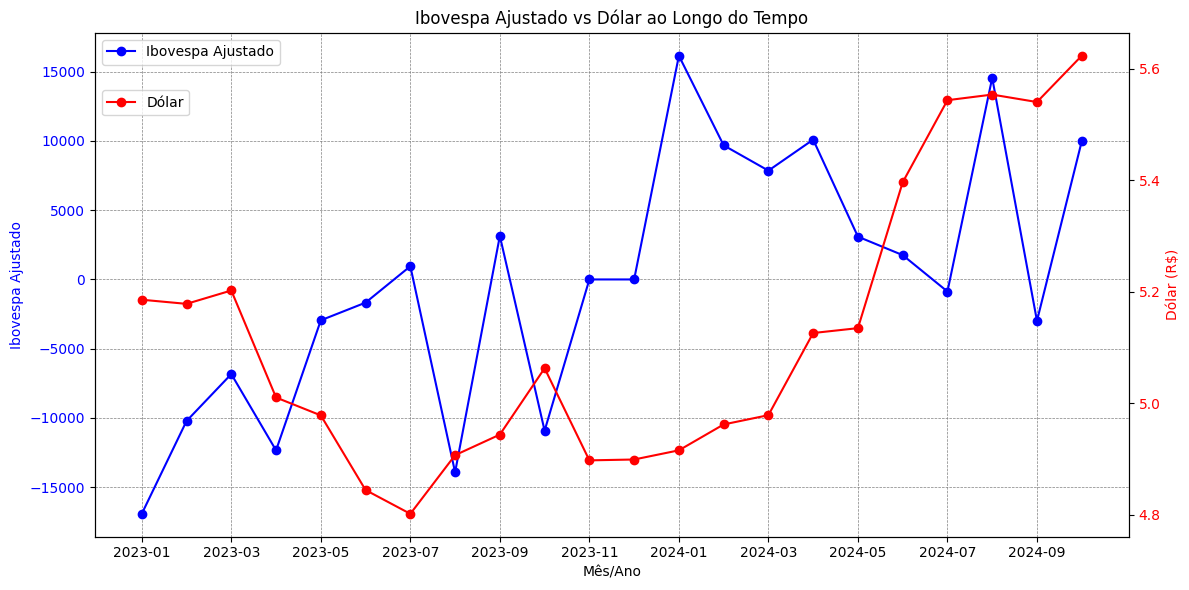

In [49]:
dfX['Mês/Ano'] = dfX['Data'].dt.to_period('M')
df_grouped4 = dfX.groupby('Mês/Ano')[['Ibovespa Ajustado', 'Dólar']].mean().reset_index()

# Criando o gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Ibovespa Ajustado
ax1.set_xlabel('Mês/Ano')
ax1.set_ylabel('Ibovespa Ajustado', color='blue')
ax1.plot(df_grouped4['Mês/Ano'].astype(str), df_grouped4['Ibovespa Ajustado'], color='blue', marker='o', label='Ibovespa Ajustado')
ax1.tick_params(axis='y', labelcolor='blue')

# Dólar
ax2 = ax1.twinx()
ax2.set_ylabel('Dólar (R$)', color='red')
ax2.plot(df_grouped4['Mês/Ano'].astype(str), df_grouped4['Dólar'], color='red', marker='o', label='Dólar')
ax2.tick_params(axis='y', labelcolor='red')

# Configurando o título
plt.title('Ibovespa Ajustado vs Dólar ao Longo do Tempo')

ticks = range(0, len(df_grouped4), 2)  # Exibir rótulos a cada 2 meses
plt.xticks(ticks=ticks, labels=df_grouped4['Mês/Ano'].astype(str).iloc[ticks], rotation=45)
ax1.grid(visible=True, which='both', axis='both', linestyle='--', linewidth=0.5, color='gray')

ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.9))

fig.tight_layout()

plt.show()

O ajuste sazonal limpou os ruídos previsíveis no Ibovespa, deixando as variações reais mais claras.
A relação inversa entre o dólar e o Ibovespa permanece consistente, reforçando que essa conexão está mais relacionada a fatores econômicos do que à sazonalidade. Mas como vimos acima, possivelmente as outras variaveis não vão se alterar muito, devido ao comportamento das mesmas e também pela quantidade de dados e o tipo deles.

Por exemplo, o Ibovespa tem uma maior variabilidade do que as outras variaveis devido ao seu formato, que está na casaa da centena de milhar e varia muito dia após dia. O dolár também, porém em uma proporção menor. Enquanto as outras variaveis para esse problema, se foi considerado um valor constante por periodos, além de que tem pouca variabilidade.

**2° Passo: Entender um pouco sobre a correlação das variaveis**

Aqui vamos ver se realmente há correlações entre as variaveis

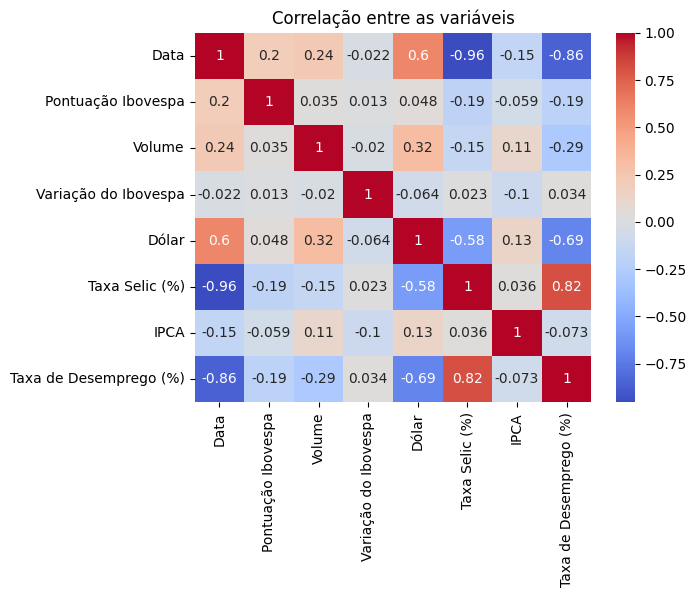

In [50]:
df_teste = df.copy()
df_teste = df_teste.drop(columns=['Mês/Ano'])

sns.heatmap(df_teste.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre as variáveis')
plt.show()

In [51]:
from scipy.stats import pearsonr

variaveis = ['Volume',  'Dólar', 'Taxa Selic (%)', 'IPCA', 'Taxa de Desemprego (%)']

resultados = {}

for var in variaveis:
    if var in df.columns:  # Garantindo que a variável existe no DataFrame
        coef, p_valor = pearsonr(df['Pontuação Ibovespa'], df[var])
        resultados[var] = {'Coeficiente': coef, 'p-valor': p_valor}

# Transformando os resultados em um DataFrame para visualização
resultados_df = pd.DataFrame(resultados).T

# Exibindo os resultados
print(resultados_df)

                        Coeficiente   p-valor
Volume                     0.034983  0.454166
Dólar                      0.047567  0.308674
Taxa Selic (%)            -0.186891  0.000055
IPCA                      -0.059148  0.205424
Taxa de Desemprego (%)    -0.192007  0.000034


**Interpretação:** Após analisarmos a correlação e o p-valor das variaveis para com a pontuação do Ibovespa, chegamos a conclusao que todas as variaveis, exceto a taxa selic e a taxa de desemprego teriam alguma correlação ou valor estatistico para com a pontuação do ibovespa, sendo dessa maneira uma correlação extremamente fraca.

No entanto, a proporção das variaveis é diferente, para realmente analisarmos com precisão, iremos transformar as variaveis para que consigamos ver exatamente a correlação real entre elas. Além de que, por as outras variaveis (exceto o dolar) estar "constante" nos meses, irei fazer a mesma coisa com a pontuação do ibovespa (e talvez do dolar) para ter uma visão real de correlação entre as variaveis

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_correlacao = df.copy()

df_correlacao[['Pontuação Ibovespa', 'Dólar','Volume', 'Taxa Selic (%)', 'IPCA', 'Taxa de Desemprego (%)']] = scaler.fit_transform(dfX[['Pontuação Ibovespa', 'Dólar','Volume', 'Taxa Selic (%)', 'IPCA', 'Taxa de Desemprego (%)']])


In [53]:
df_correlacao.head()

,Data,Pontuação Ibovespa,Volume,Variação do Ibovespa,Dólar,Taxa Selic (%),IPCA,Taxa de Desemprego (%),Mês/Ano
0,2023-01-03,-0.128444,-0.137678,-2.08,1.343305,1.183665,0.655592,0.631057,2023-01
1,2023-01-04,-0.095637,-0.137696,1.12,1.157771,1.183665,0.655592,0.631057,2023-01
2,2023-01-05,-0.030836,-0.136740,2.19,0.850588,1.183665,0.655592,0.631057,2023-01
3,2023-01-06,0.006325,-0.139338,1.23,0.370494,1.183665,0.655592,0.631057,2023-01
4,2023-01-09,-2.747797,-0.139861,0.15,0.482197,1.183665,0.655592,0.631057,2023-01


In [54]:
# fazendo o ibovespa (media da pontuação por mes)

# Ensure 'Mês/Ano' column is in df_correlacao
if 'Mês/Ano' not in df_correlacao.columns:
    df_correlacao['Mês/Ano'] = dfX['Mês/Ano']  # Assuming dfX still has 'Mês/Ano'

df_correlacao['Pontuação Ibovespa'] = df_correlacao.groupby('Mês/Ano')['Pontuação Ibovespa'].transform('mean')
#df_correlacao['Dólar'] = df_correlacao.groupby('Mês/Ano')['Dólar'].transform('mean')

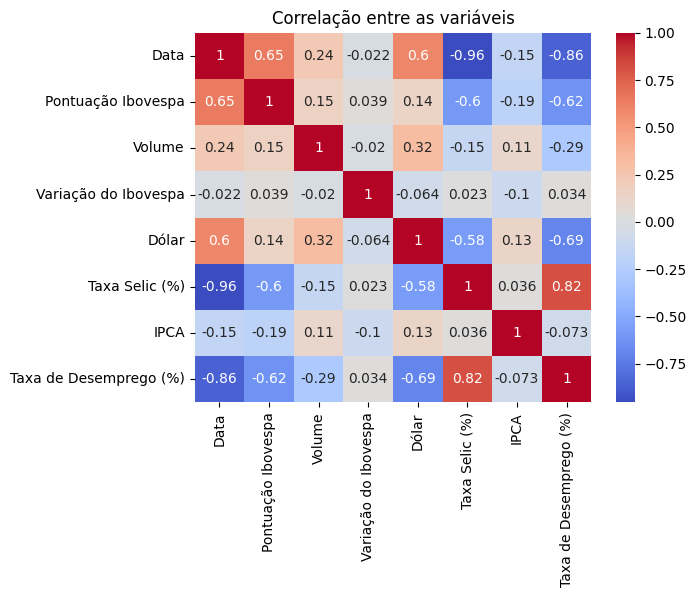

In [55]:
df_correlacao = df_correlacao.copy()

df_correlacao = df_correlacao.drop(columns=['Mês/Ano'])
sns.heatmap(df_correlacao.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação entre as variáveis')
plt.show()

In [56]:
# Agora o P-valor

variaveis_correlacao = ['Volume',  'Dólar', 'Taxa Selic (%)', 'IPCA', 'Taxa de Desemprego (%)']

resultados_correlacao = {}

for var in variaveis:
    if var in df_correlacao.columns:  # Garantindo que a variável existe no DataFrame
        coef, p_valor = pearsonr(df_correlacao['Pontuação Ibovespa'], df_correlacao[var])
        resultados[var] = {'Coeficiente': coef, 'p-valor': p_valor}

# Transformando os resultados em um DataFrame para visualização
resultados_df_correlacao = pd.DataFrame(resultados).T

# Exibindo os resultados
print(resultados_df_correlacao)

                        Coeficiente       p-valor
Volume                     0.153364  9.672461e-04
Dólar                      0.136931  3.253460e-03
Taxa Selic (%)            -0.595007  2.153909e-45
IPCA                      -0.194264  2.726378e-05
Taxa de Desemprego (%)    -0.621945  1.362452e-50


**Interpretação:** Agora com os dados já trabalhados, podemos ter outra interpretação dos dados.

De correlações fortes temos, a taxa selic e a taxa de desemprego, sendo uma correlação forte negativa e tendo um p-valor extremamente significativo (p<0,05), o que podemos confirmar que com a taxa de juros alta e a taxa de desemprego alta, gera menos investimento em ações.

De correlações fracas temoss o Dólar e o IPCA, mas estatisticamente significantes. Algo incomum é o dolar estar com correlação positiva para com o ibovespa.

Isso se deve ao fato de que nos dados que coletamos, não teve o dados o suficiente para analisar realmente a correlação entre as duas variaveis  como vimos.

**3° Passo: Outliers**

Nesse estudo, não irei tratar os outliers pois todos os dados nesse estudo são valiosos, haja vista por exemplo a variação que ocorre na bolsa de valores. Então com essa justificativa, não irei remover os outliers.

**4° Passo: Analisar a pontuação do Ibovespa por mês**

Agora irei analisar apenas a pontuação do Ibovespa ao longo dos meses para assim ter uma análise completa do meu contexto e da minha  variável alvo

<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

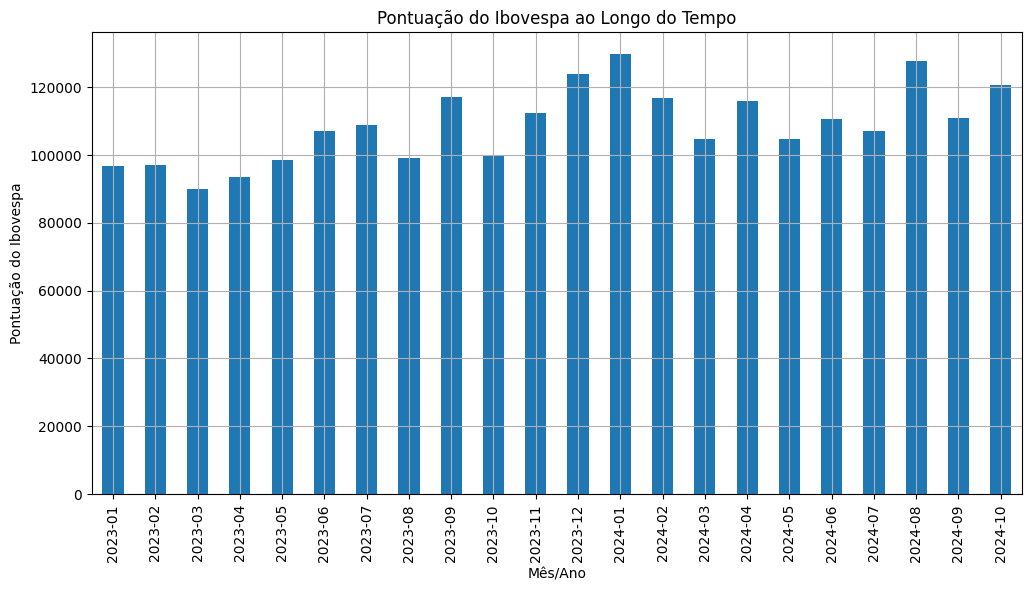

In [57]:
df_pontuacao_mes = df.copy()
df_pontuacao_mes['Mês/Ano'] = df_pontuacao_mes['Data'].dt.to_period('M')
df_pontuacao_mes.groupby('Mês/Ano')['Pontuação Ibovespa'].mean().plot(kind='bar', figsize=(12, 6))
plt.title('Pontuação do Ibovespa ao Longo do Tempo')
plt.xlabel('Mês/Ano')
plt.ylabel('Pontuação do Ibovespa')
plt.grid(True)

plt.xlabel('Mês/Ano')
plt.ylabel

In [58]:
df.head()

,Data,Pontuação Ibovespa,Volume,Variação do Ibovespa,Dólar,Taxa Selic (%),IPCA,Taxa de Desemprego (%),Mês/Ano
0,2023-01-03,104166.0,14470000.0,-2.08,5.4797,13.75,0.53,8.1,2023-01
1,2023-01-04,105334.0,14450000.0,1.12,5.4312,13.75,0.53,8.1,2023-01
2,2023-01-05,107641.0,15510000.0,2.19,5.3509,13.75,0.53,8.1,2023-01
3,2023-01-06,108964.0,12630000.0,1.23,5.2254,13.75,0.53,8.1,2023-01
4,2023-01-09,10913.0,12050000.0,0.15,5.2546,13.75,0.53,8.1,2023-01


# Desenvolvimento da Solução

Agora que já concluimos a análise exploratória e concluimos alguns entedimentos cruciais da nossa base, o próximo passo é escolher um modelo para fazer nossas predições. O modelo escolhido será de regressão, pois nesse caso estamos querendo prever uma variável contínua (Pontuação do Ibovespa).

O número total de algoritmos foi definido por N+1, onde n é o número de participantes do grupo. Como no caso é somente eu, terei que utilizar 2 algori

In [59]:
df.head(1)

,Data,Pontuação Ibovespa,Volume,Variação do Ibovespa,Dólar,Taxa Selic (%),IPCA,Taxa de Desemprego (%),Mês/Ano
0,2023-01-03,104166.0,14470000.0,-2.08,5.4797,13.75,0.53,8.1,2023-01


In [60]:
# Média do Ibovespa por mÊs
dfX = df.copy()
dfX['Pontuação Ibovespa'] = dfX.groupby('Mês/Ano')['Pontuação Ibovespa'].transform('mean')
dfX = dfX.drop(columns=['Mês/Ano'])
dfX.head()

,Data,Pontuação Ibovespa,Volume,Variação do Ibovespa,Dólar,Taxa Selic (%),IPCA,Taxa de Desemprego (%)
0,2023-01-03,96604.095238,14470000.0,-2.08,5.4797,13.75,0.53,8.1
1,2023-01-04,96604.095238,14450000.0,1.12,5.4312,13.75,0.53,8.1
2,2023-01-05,96604.095238,15510000.0,2.19,5.3509,13.75,0.53,8.1
3,2023-01-06,96604.095238,12630000.0,1.23,5.2254,13.75,0.53,8.1
4,2023-01-09,96604.095238,12050000.0,0.15,5.2546,13.75,0.53,8.1


**Justificativa:** Coloquei a base de dados do ibovespa na média por mês devido as minhas outras variáveis (exceto o dólar, mas o mesmo tem variação menor) estarem assim, pois elas foram dadas em intervalos.

In [61]:
# Separando a variavel alvo e as features
X = dfX[['Dólar', 'Taxa Selic (%)', 'IPCA', 'Taxa de Desemprego (%)']]
y = dfX['Pontuação Ibovespa']

# **Regressão Linear**

Para começar, irei utilizar a regressão linear para prever o valor do ibovespa primeiramente, posteriormente, irei avaliar as features e fazer uma validação cruzada no meu modelo.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
r1 = LinearRegression()
r1.fit(X_test,y_test)

LinearRegression()

In [65]:
# Métricas do treino

print(f'R2 do treinamento: {r2_score(y_test, r1.predict(X_test))}')
print(f'MSE do treinamento: {mean_squared_error(y_test, r1.predict(X_test))}')

R2 do treinamento: 0.6499772426717962
MSE do treinamento: 44765767.442553066


In [66]:
# Métricas do teste

print(f'R2 do teste: {r2_score(y_train, r1.predict(X_train))}')
print(f'MSE do teste: {mean_squared_error(y_train, r1.predict(X_train))}')

R2 do teste: 0.5933359736388283
MSE do teste: 46668264.71236464


**Interpretação:** Podemos concluir que o modelo está generalizando razoavelmente bem, pois não temos uma diferença gritante das métricas de treino para as metricas de teste, reforçando que não há sinais claro de overfiting até agora.

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

In [68]:
def validacao_cruzada(modelo, X, y, cv=5):
    # Iniciando o K-fold com embaralhamento
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    # Configurando nossas métricas
    scoring = {
        'mse': make_scorer(mean_squared_error),
        'r2':make_scorer(r2_score)
    }

    # Realizando validação cruzada e obtendo métricas
    metricas = cross_validate(modelo, X, y, cv=kf, scoring=scoring,
                              return_train_score=True)

    # Exibindo métricas
    print('Métricas de treinamento:')
    print('Mean Squared Error (MSE):',
          f"{metricas['train_mse'].mean()} ± {metricas['train_mse'].std()}")
    print('R2 Score:',
          f"{metricas['train_r2'].mean()} ± {metricas['train_r2'].std()}")

    print('Métricas de teste:')
    print('Mean Squared Error (MSE):',
          f"{metricas['test_mse'].mean()} ± {metricas['test_mse'].std()}")
    print('R2 Score:',
          f"{metricas['test_r2'].mean()} ± {metricas['test_r2'].std()}")

In [69]:
print('Validação Cruzada')
print('-='*50)
validacao_cruzada(r1, X, y)

Validação Cruzada
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Métricas de treinamento:
Mean Squared Error (MSE): 45749432.17213245 ± 767164.9982934855
R2 Score: 0.6104805733640052 ± 0.005780521520738599
Métricas de teste:
Mean Squared Error (MSE): 46045049.708139434 ± 3093131.3440651274
R2 Score: 0.6051597249729187 ± 0.02504992476549075


**Interpretação:** Por está avaliação, o modelo está mais estável e não tem um overfiting, pois está mais parecida as métricas, o que gera um melhor ajuste. Isso se deve a natureza da validação cruzada, que dividiu meu dataset em 5 e treinou 4 e testou 1, e repetiu isso em 5x para que pudesse ter uma validação melhor.

In [70]:
# Selecionando as melhores features

from sklearn.feature_selection import SequentialFeatureSelector

In [71]:
# Testando com 1 feature

seletor_1 = SequentialFeatureSelector(r1, n_features_to_select=1, direction='forward')
seletor_1.fit(X, y)

features_selecionadas_1 = list(X.columns[seletor_1.support_])
print('Features selecionadas:', features_selecionadas_1)

Features selecionadas: ['Taxa de Desemprego (%)']


In [72]:
# Analisando as métricas com 2 variaveis

r1.fit(X[features_selecionadas_1], y)
print('Métricas com 2 features:')
print(f'R2 score: {r2_score(y, r1.predict(X[features_selecionadas_1]))}')
print(f'MSE: {mean_squared_error(y, r1.predict(X[features_selecionadas_1]))}')

print('-='*50)
print('Validação Cruzada com 2 features:')
print('-='*50)
validacao_cruzada(r1, X[features_selecionadas_1], y)

Métricas com 2 features:
R2 score: 0.38681605775007477
MSE: 72049437.43417683
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Validação Cruzada com 2 features:
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Métricas de treinamento:
Mean Squared Error (MSE): 71982782.1669358 ± 1554002.355821213
R2 Score: 0.38719622651996366 ± 0.008019625858238122
Métricas de teste:
Mean Squared Error (MSE): 72649220.90290819 ± 6023460.897065213
R2 Score: 0.37839218628103827 ± 0.027910649028418697


In [73]:
# Testando com 2 features

seletor_2 = SequentialFeatureSelector(r1, n_features_to_select=2, direction='forward')
seletor_2.fit(X, y)

features_selecionadas_2 = list(X.columns[seletor_2.support_])
print('Features selecionadas:', features_selecionadas_2)

Features selecionadas: ['Dólar', 'Taxa de Desemprego (%)']


In [74]:
# Analisando as métricas com 2 variaveis

r1.fit(X[features_selecionadas_2], y)
print('Métricas com 2 features:')
print(f'R2 score: {r2_score(y, r1.predict(X[features_selecionadas_2]))}')
print(f'MSE: {mean_squared_error(y, r1.predict(X[features_selecionadas_2]))}')

print('-='*50)
print('Validação Cruzada com 2 features:')
print('-='*50)
validacao_cruzada(r1, X[features_selecionadas_2], y)

Métricas com 2 features:
R2 score: 0.5534537546206076
MSE: 52469419.9425328
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Validação Cruzada com 2 features:
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Métricas de treinamento:
Mean Squared Error (MSE): 52426036.432344474 ± 842270.5101444746
R2 Score: 0.5536021098830408 ± 0.008300830802484912
Métricas de teste:
Mean Squared Error (MSE): 52859093.64240871 ± 3263828.496421228
R2 Score: 0.5461189362391272 ± 0.03479830107546591


In [75]:
# Testando com 3 features

seletor_3 = SequentialFeatureSelector(r1, n_features_to_select=3, direction='forward')
seletor_3.fit(X, y)

features_selecionadas_3 = list(X.columns[seletor_3.support_])
print('Features selecionadas:', features_selecionadas_3)

Features selecionadas: ['Dólar', 'IPCA', 'Taxa de Desemprego (%)']


In [76]:
# Analisando as métricas com 3 variaveis

r1.fit(X[features_selecionadas_3], y)
print('Métricas com 2 features:')
print(f'R2 score: {r2_score(y, r1.predict(X[features_selecionadas_3]))}')
print(f'MSE: {mean_squared_error(y, r1.predict(X[features_selecionadas_3]))}')

print('-='*50)
print('Validação Cruzada com 2 features:')
print('-='*50)
validacao_cruzada(r1, X[features_selecionadas_3], y)

Métricas com 2 features:
R2 score: 0.5920693151367105
MSE: 47932071.16398858
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Validação Cruzada com 2 features:
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Métricas de treinamento:
Mean Squared Error (MSE): 47895328.863829985 ± 940394.065465645
R2 Score: 0.592211393328048 ± 0.007296135544624601
Métricas de teste:
Mean Squared Error (MSE): 48263999.12440227 ± 3753927.4302583863
R2 Score: 0.5860927734523587 ± 0.03115946476154532


**Conclusão:** Podemos definir que o modelo de regressão linear utilizado aqui, conseguiu uma performace de aproximadamente r2 = 60, mede o quanto o modelo explica a variação da variável alvo com base nas variáveis que estou utilizando como entrada. A melhor seleção das variaveis foi com 4 features, em seguida por 3, 2 e o pior que foi de 1 feature. E podemos afirmar que o modelo de validação cruzada ajudou, porém ele reduziu um pouco a distância dos dados de treino e dos dados de teste baseado na divisão antes feita (80% treino e 20% teste).

Por fim, podemos concluir que para um cenário caótico como a bolsa de valores brasileira, o algoritmo de regressão linear se comportou bem para o que ele se propos a fazer, tendo alguns erros no entanto ainda tendo um desempenho relevante para dados reais.

**Regressão Linear:** Validação cruzada e avalição das features

**Regressão Polinomial:** Avaliação do poliomio, Validação cruzada e avalição das features

**XBost:** Avaliação de hiperparametros, features e cruzada.

**RandonForest:** Avaliação de hiperparametros, features e cruzada.

# **XGBoost**

Agora irei usar o XGBoost que é uma técnica mais aprimorada para conseguirmos analisar a pontuação do Ibovespa, um modelo que pode ser utilizado e aprimorada para modelos de regressão e classificação (nesse caso será utilizado para um modelop de regressão).

Para mais informações: https://www.datageeks.com.br/xgboost/#como-funciona-o-xgboost

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

In [78]:
gbr = GradientBoostingRegressor(n_estimators=100,
                                learning_rate=0.01,
                                max_depth=5,
                                random_state=42)

In [79]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, random_state=42)

In [80]:
# Métricas do modelo teste

print(f'R2 do teste: {r2_score(y_test, gbr.predict(X_test))}')
print(f'MSE do teste: {mean_squared_error(y_test, gbr.predict(X_test))}')

R2 do teste: 0.8255808731748631
MSE do teste: 22307138.337482337


In [88]:
# Métricas dos dados de treino

print(f'R2 do treino: {r2_score(y_train, gbr.predict(X_train))}')
print(f'MSE do treino: {mean_squared_error(y_train, gbr.predict(X_train))}')

R2 do treino: 0.8495480410188068
MSE do treino: 17265682.216976516


**Interpretação:**

Podemos concluir que o r2 do teste estão muito parecidas, no entanto com um salto de 0.20 em comparação ao modelo de regressão linear, no entanto ainda podemos realizar mais algumas otimizações, como a seleção das features, validação cruzada e ajustar os melhores parametros.

In [89]:
# Fazendo a validação cruzada para o XGBoost

print('Validação Cruzada')
print('-='*50)
validacao_cruzada(gbr, X, y)

Validação Cruzada
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Métricas de treinamento:
Mean Squared Error (MSE): 17949271.605260015 ± 474705.3146360761
R2 Score: 0.8472152615652883 ± 0.001735899159576767
Métricas de teste:
Mean Squared Error (MSE): 18376690.999942068 ± 2325741.9606680917
R2 Score: 0.8433040214803544 ± 0.009699676079415598


**Interpretação:**

Podemos interpretar que a validação cruzada obteve os resultados aproximados do modelo treinado acima separados pelos parametros usados acima. No entanto os dados de treinamento e os dados do teste são semelhantes, com uma diferença minima.

In [96]:
# Selecionando as melhores variaveis

seletor_1 = SequentialFeatureSelector(gbr, n_features_to_select=1, direction='forward')
seletor_1.fit(X, y)

features_selecionadas_1 = list(X.columns[seletor_1.support_])
print('Features selecionadas (1 variavel):', features_selecionadas_1)

seletor_2 = SequentialFeatureSelector(gbr,n_features_to_select=2, direction='forward')
seletor_2.fit(X, y)

features_selecionadas_2 = list(X.columns[seletor_2.support_])
print('Features selecionadas (2 variaveis):', features_selecionadas_2)

seletor_3 = SequentialFeatureSelector(gbr,n_features_to_select=3, direction='forward')
seletor_3.fit(X, y)

features_selecionadas_3 = list(X.columns[seletor_3.support_])
print('Features selecionadas (3 variaveis):', features_selecionadas_3)

Features selecionadas (1 variavel): ['Taxa Selic (%)']
Features selecionadas (2 variaveis): ['Dólar', 'Taxa Selic (%)']
Features selecionadas (3 variaveis): ['Dólar', 'Taxa Selic (%)', 'Taxa de Desemprego (%)']


In [92]:
# Treinando o modelo com 1 variavel

gbr.fit(X[features_selecionadas_1], y)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, random_state=42)

In [93]:
# Métricas do treino

print(f'R2 do teste: {r2_score(y, gbr.predict(X[features_selecionadas_1]))}')
print(f'MSE do teste: {mean_squared_error(y, gbr.predict(X[features_selecionadas_1]))}')

print('-='*50)
print(f'R2 do treino: {r2_score(y, gbr.predict(X[features_selecionadas_1]))}')
print(f'MSE do treino: {mean_squared_error(y, gbr.predict(X[features_selecionadas_1]))}')

R2 do teste: 0.5180193704718289
MSE do teste: 56632978.81587564
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
R2 do treino: 0.5180193704718289
MSE do treino: 56632978.81587564


In [97]:
# Treinando o modelo com 2 variaveis

gbr.fit(X[features_selecionadas_2], y)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, random_state=42)

In [98]:
# Métricas do treino

print(f'R2 do teste: {r2_score(y, gbr.predict(X[features_selecionadas_2]))}')
print(f'MSE do teste: {mean_squared_error(y, gbr.predict(X[features_selecionadas_2]))}')

print('-='*50)
print(f'R2 do treino: {r2_score(y, gbr.predict(X[features_selecionadas_2]))}')
print(f'MSE do treino: {mean_squared_error(y, gbr.predict(X[features_selecionadas_2]))}')

R2 do teste: 0.6936087493050992
MSE do teste: 36001133.96042562
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
R2 do treino: 0.6936087493050992
MSE do treino: 36001133.96042562


In [99]:
# Treinando o modelo com 3 variaveis

gbr.fit(X[features_selecionadas_3], y)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, random_state=42)

In [101]:
# Métricas do treino

print(f'R2 do teste: {r2_score(y, gbr.predict(X[features_selecionadas_3]))}')
print(f'MSE do teste: {mean_squared_error(y, gbr.predict(X[features_selecionadas_3]))}')
print('-='*50)
print(f'R2 do treino: {r2_score(y, gbr.predict(X[features_selecionadas_3]))}')
print(f'MSE do teste: {mean_squared_error(y, gbr.predict(X[features_selecionadas_3]))}')


R2 do teste: 0.8140893550919508
MSE do teste: 21844599.076585796
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
R2 do treino: 0.8140893550919508
MSE do teste: 21844599.076585796


**Conclusão:**

Podemos concluir que que o melhor modelo é com as 4 variaveis, ou seja, o modelo com todas as variaveis. Então a partir disso, iremos para o ultimo passo que é ver quais são os melhores hiperparametros para esse modelo

In [105]:
from sklearn.model_selection import GridSearchCV

# Selecionando os melhores parametros
parametros = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
  'max_depth': [3,5,7]
}

grid_search = GridSearchCV(gbr, parametros,
                           cv=5, scoring='r2')

grid_search.fit(X, y)

melhor_modelo = grid_search.best_estimator_
melhores_parametros = grid_search.best_params_

print('Melhores parâmetros:', melhores_parametros)


Melhores parâmetros: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 150}


In [106]:
# Agora treinando o modelo com os melhores parametros

gbr = GradientBoostingRegressor(n_estimators=150,
                                learning_rate=0.01,
                                max_depth=5,
                                random_state=42)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, n_estimators=150,
                          random_state=42)

In [107]:
# Analisando as métricas do modelo

print(f'R2 do teste: {r2_score(y_test, gbr.predict(X_test))}')
print(f'MSE do teste: {mean_squared_error(y_test, gbr.predict(X_test))}')
print('-='*50)
print(f'R2 do treino: {r2_score(y_train, gbr.predict(X_train))}')
print(f'MSE do treino: {mean_squared_error(y_train, gbr.predict(X_train))}')

R2 do teste: 0.9138709829052393
MSE do teste: 11015373.910972454
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
R2 do treino: 0.9400642036493979
MSE do treino: 6878158.451497943


In [108]:
# Testando com a validação cruzada

print('Validação Cruzada')
print('-='*50)
validacao_cruzada(gbr, X, y)

Validação Cruzada
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Métricas de treinamento:
Mean Squared Error (MSE): 7303992.50332579 ± 288045.19206751836
R2 Score: 0.937830533773919 ± 0.0018921781188883714
Métricas de teste:
Mean Squared Error (MSE): 7907035.157682138 ± 1619963.9926504788
R2 Score: 0.9327121950694 ± 0.010221412403200496


**Interpretação:**

Podemos concluir que o modelo de XGBoost com os melhores hiperparametros foi o mais efetivo e que vai conseguir predizer melhor a variavel alvo, haja vista que com os melhores hiperparametros tivemos uma melhora de quase 0.1 do nosso R2, oq para esse cenário caótico que é o mercado de ações brasileira é excelente.

# **Considerações Finais**

Vimos todo o processo de carregamento, tratamento dos dados, analise exploratoria e os algoritmos em prática. Aqui foram mesclados 5 base de dados diferentes, algumas delas em diferentes sites para compor o trabalho final.

Uma das principais dificuldades em si foi achar os dados e posteriormente trabalhar com eles, pois a pontuação do ibovespa tem muita variação e é um número muito maior do que as outras variaveis analisadas, que teve suas particulariadades na hora de tratar elas.

Os algoritmos escolhidos foram a regressão linear e o XGBoost, pois são utilizados para modelos de regressão, em que o foco é predizer a variavel alvo com base nas outras variaveis. Em resumo, a regressão linear se comportou até bem nesse conjunto, no entanto o XGBoost foi o melhor modelo apresentado até aqui, em que o modelo treinado foi algo surreal para o conjunto de dados.

**Pontos de melhoria:**

Como sugestão para a melhoria desse trabalho, se faz necessário uma maior coleta dos dados, haja vista que para a analisa de dados desse maneira, é de extrema importância achar um intervalo maior de dados, que pegue vários momentos da B3 (como o momento do COVID, por exemplo). Outro ponto foi o dolar aqui, que teve uma correlação positiva com o ibovespa nesses dados, e como sabemos, a correlação deles na vida real é negativa.

Outra melhoria, se diz a respeito da coleta das variaveis, haja vista o tratamento que tive que fazer ao longo do trabalho. Para ser mais acertivo e ter uma melhor conclusão, seria melhor uma coleta mais aprimorada desses dados, ao inves de inferir em intervalos (como eu fiz). E mais um ponto sobre isso, é a coleta de outras variaveis, como PIB. Digo isso pois os melhores modelos treinados, tinham que ter o número maximo das variaveis, e talvez seria interessante testar mais variaveis para predizer.

E o último ponto, porém um dos mais importantes, é a escolha do algoritmo. Conversando com algumas pessoas e até mesmo com o professor, o melhor modelo debatido para conseguir prever algo nesses tipos de dados (de mercado variavel e tudo mais) seria o modelo de séries temporais, pois o mesmo ira capturar todos os momentos dentro de um intervalo bem graande de tempo e assim faria uma melhor previsão dos dados como um todo, e iria capturar mais momentos do mercado.
